# Iris Species Classification Project
Project Type: Machine Learning


## Define the Problem
I want to classify iris flower species based on their features (sepal length, sepal width, petal length, petal width).

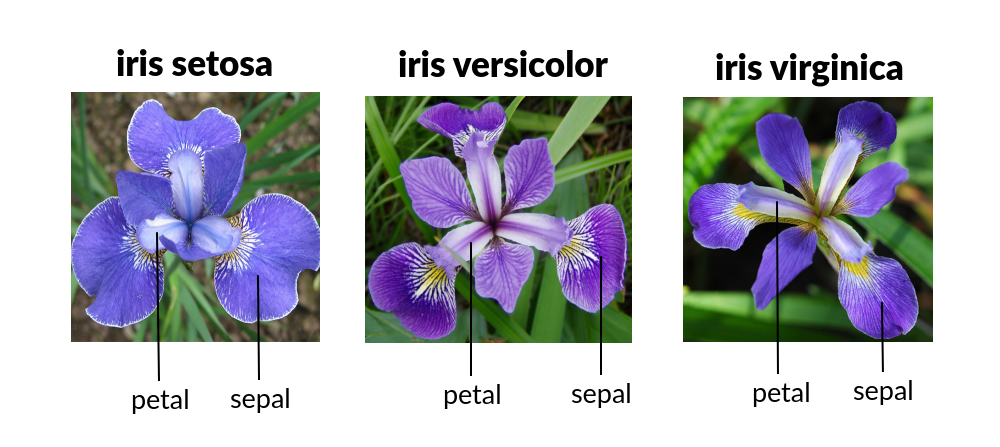

## Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df_iris = pd. read_csv('dataset.csv')
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)
understand the distribution and relationships of the features in the Iris dataset. Visualize the data using plots such as box plots, and pair plots.

In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_iris['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df_iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


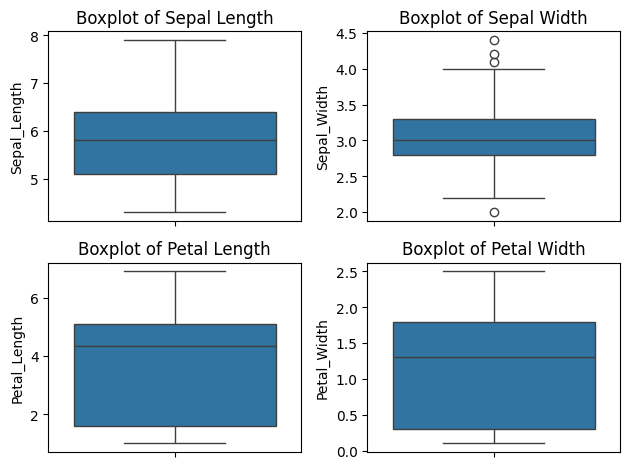

In [7]:
plt.subplot(2, 2, 1)
sns.boxplot(y=df_iris['Sepal_Length'])
plt.title('Boxplot of Sepal Length')

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(y=df_iris['Sepal_Width'])
plt.title('Boxplot of Sepal Width')

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(y=df_iris['Petal_Length'])
plt.title('Boxplot of Petal Length')

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(y=df_iris['Petal_Width'])
plt.title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()

**insight:**
  
- There are no points outside the whiskers, indicating no outliers in the sepal length data.
- There are several points outside the whiskers (above and below), indicating potential outliers in the sepal width data.
- There are no points outside the whiskers, indicating no outliers in the petal length data.
- There are no points outside the whiskers, indicating no outliers in the petal width data.

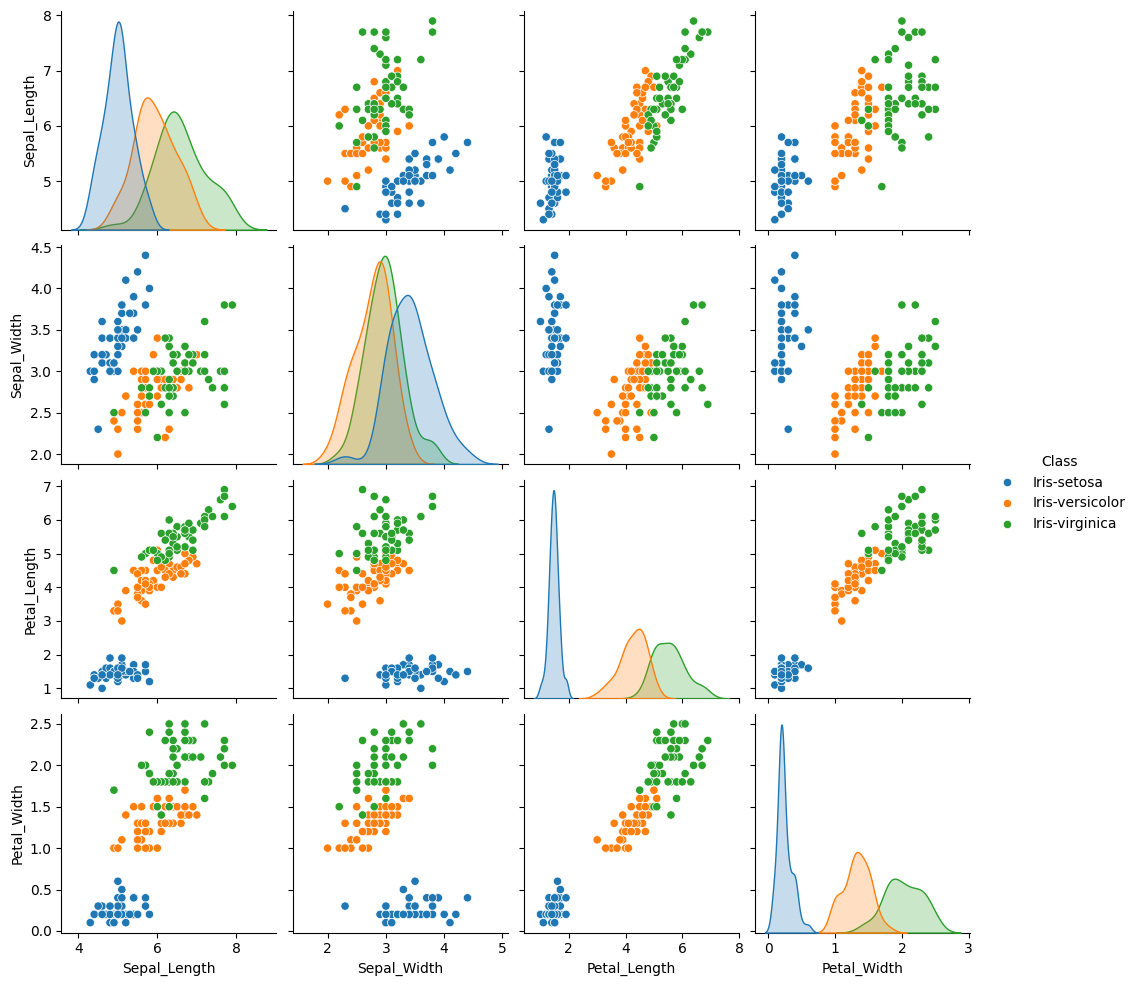

In [8]:
# Pairplot to visualize relationships
sns.pairplot(df_iris, hue='Class')

**insight:**
- Good Separators: Sepal Width and Petal Length are strong features for separating Iris-setosa from the other two species.
- Overlapping Classes: There is considerable overlap between Iris-versicolor and Iris-virginica, indicating that additional features or more complex models might be needed for better classification.


## Data Preprocessing 
Clean the data, handle missing values, perform feature engineering, and normalize or standardize the data if required.

**1- Missing Values**

In [9]:
# Check for missing values
df_iris.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

**2- Remove Outliers**

In [10]:
# remove outliers using IQR method

Q1 = df_iris['Sepal_Width'].quantile(0.25)
Q3 = df_iris['Sepal_Width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iris = df_iris[(df_iris['Sepal_Width'] >= lower_bound) & (df_iris['Sepal_Width'] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot of Sepal Width')

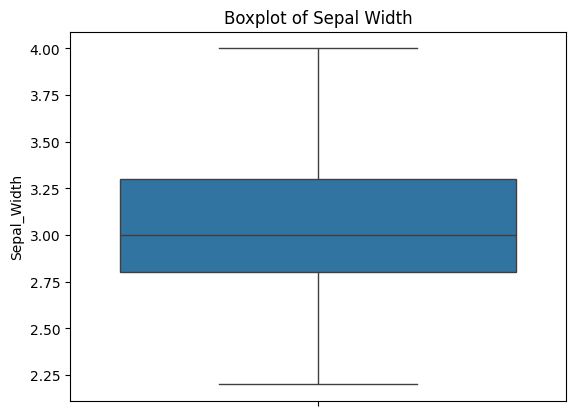

In [11]:
sns.boxplot(y=df_iris['Sepal_Width'])
plt.title('Boxplot of Sepal Width')

In [12]:
df_iris.shape

(146, 5)

**3- Encoding Categorical Variables**

In [13]:
# encoding target variable
from sklearn.preprocessing import LabelEncoder

# Encode the class column
label_encoder = LabelEncoder()
df_iris['Class'] = label_encoder.fit_transform(df_iris['Class'])


In [14]:
# Print the mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:")
print(label_mapping)

Label encoding mapping:
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [15]:
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**4- Data Scaling**

In [16]:
# Normalize the features if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df_iris.drop('Class', axis=1)
scaled_features = scaler.fit_transform(features)

# Combine the scaled features with the class labels
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Class'] = df_iris['Class'].reset_index(drop=True)

In [17]:
scaled_data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,-0.910515,1.175789,-1.374878,-1.345899,0
1,-1.151122,-0.093924,-1.374878,-1.345899,0
2,-1.391729,0.413961,-1.431986,-1.345899,0
3,-1.512032,0.160019,-1.317771,-1.345899,0
4,-1.030819,1.429732,-1.374878,-1.345899,0


## Split the Data
Divide the dataset into training and test sets, typically using an 80/20 split ratios.



In [18]:
from sklearn.model_selection import train_test_split

X = scaled_data.drop('Class', axis=1)
y = scaled_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select the Evaluation Metric
Choose appropriate evaluation metrics for classification, such as accuracy, precision, recall, F1-score, and confusion matrix.



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred, average="macro"):.2f}')
    print(f'Recall: {recall_score(y_true, y_pred, average="macro"):.2f}')
    print(f'F1 Score: {f1_score(y_true, y_pred, average="macro"):.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))

## Choose a Model and Evaluate the model
Select and train a suitable machine learning algorithm.

In [25]:
from sklearn.svm import SVC

# Define and train the model
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy: 0.97
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


**insight:**

Based on the output the Support Vector Machine (SVM) model performed the best with the highest accuracy, precision, recall, and F1 score than other model. 


Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and K-Nearest Neighbors (KNN) have same output which is

Accuracy: 0.93
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy: 0.93
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


In [24]:
from sklearn.linear_model import LogisticRegression

# Define and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy: 0.93
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
